### Imports

In [160]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from collections import Counter
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

### Clean Data

In [28]:
#check the extentions
def check_extentions(directory):
    ext_list = [img_name.split('.')[-1] for img_name in os.listdir(directory)]
    print(f'In directory \'{directory}\':')
    print(f'images extentions: {Counter(ext_list_happy)}')
    print('_____________________________________________')

In [30]:
check_extentions('data/happy')
check_extentions('data/sad')

In directory 'data/happy':
images extentions: Counter({'jpg': 112, 'jpeg': 35, 'png': 6})
_____________________________________________
In directory 'data/sad':
images extentions: Counter({'jpg': 112, 'jpeg': 35, 'png': 6})
_____________________________________________


In [32]:
#remove the unexpected extentions
def remove_ext(allowed_ext, directory):
    cnt = 0
    for img_name in os.listdir('data/sad/.'):
        ext = img_name.split('.')[-1]
        if ext not in allowed_ext:
            os.remove(f'data/sad/{img_name}')
            cnt += 1
    print(f'{cnt} file removed.')

In [34]:
remove_ext(['jpg', 'jpeg', 'png'], 'data/happy')
remove_ext(['jpg', 'jpeg', 'png'], 'data/sad')

0 file removed.
0 file removed.


### Load Data

In [149]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    'data',
    batch_size=8,
    image_size=(220, 220),
    validation_split=0.2,
    subset='training',
    seed=123,
)

Found 305 files belonging to 2 classes.
Using 244 files for training.


In [150]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    'data',
    image_size=(220, 220),
    batch_size=8,
    validation_split=0.2,
    subset='validation',
    seed=123,
)

Found 305 files belonging to 2 classes.
Using 61 files for validation.


### Visualization

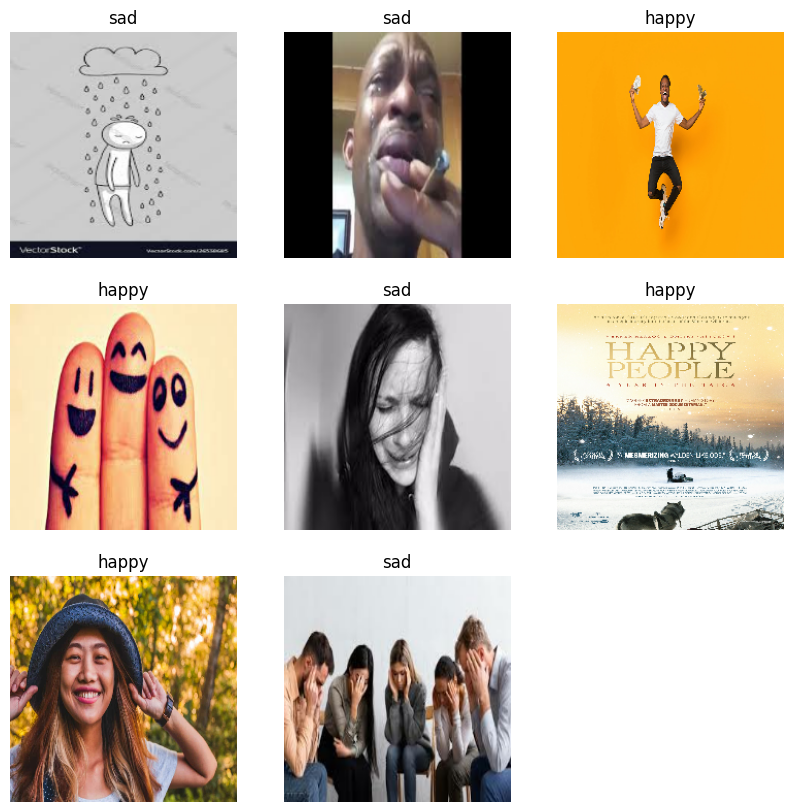

In [151]:
#first batch of training dataset
plt.figure(figsize=(10, 10))
first_batch = train_ds.take(1)
x, y = first_batch.as_numpy_iterator().next()
for i in range(8):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(x[i].astype('uint8'))
    plt.title(train_ds.class_names[y[i]])
    plt.axis('off')

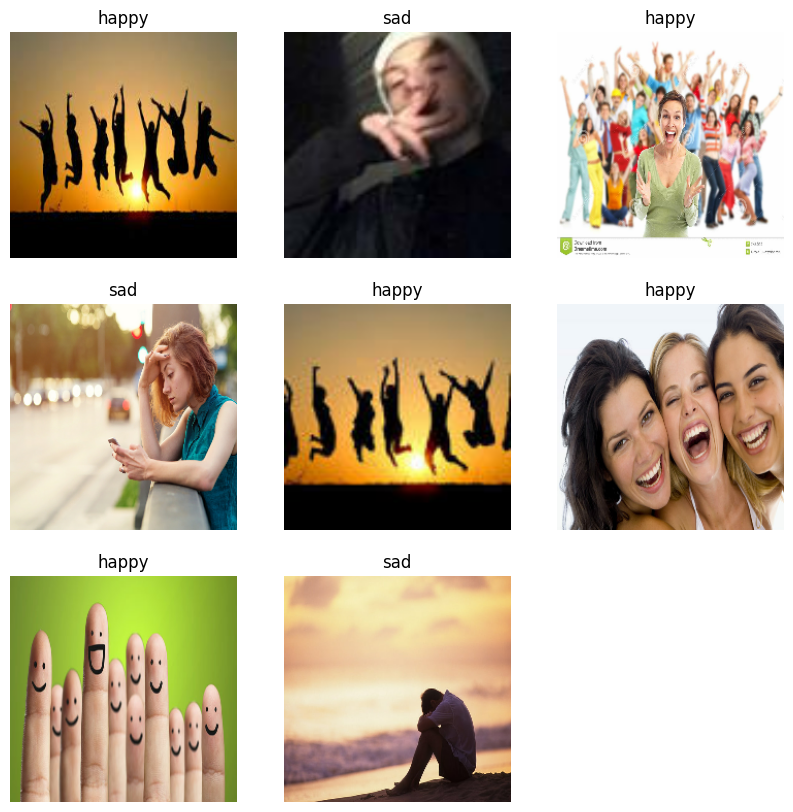

In [156]:
#first batch of validation dataset
plt.figure(figsize=(10, 10))
x, y = val_ds.take(1).as_numpy_iterator().next()
for i in range(8):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(x[i].astype('uint8'))
    plt.title(val_ds.class_names[y[i]])
    plt.axis('off')

### Scale Data

In [157]:
train_ds = train_ds.map(lambda x, y : (x/255, y))
val_ds = val_ds.map(lambda x, y : (x/255, y))

### Build Deep Learning Model

In [183]:
model_1 = tf.keras.models.Sequential()

In [184]:
model_1.add(Conv2D(16, (3, 3), activation='relu', input_shape=(220, 220, 3)))
model_1.add(MaxPooling2D())
model_1.add(Conv2D(32, (3, 3), activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Conv2D(128, (3, 3), activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Conv2D(256, (3, 3), activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Flatten())
model_1.add(Dense(1024, activation='relu'))
model_1.add(Dense(512, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [185]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 109, 109, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 51, 51, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 25, 25, 64)      

### Compile and Train

In [187]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Recall', 'Precision'])

In [189]:
#using Tensorflow Board for Tuning
tensorflow_callback = tf.keras.callbacks.TensorBoard()

In [190]:
result = model_1.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=tensorflow_callback)

Epoch 1/10
31/31 [==============================] - 35s 951ms/step - loss: 0.7237 - accuracy: 0.5123 - recall: 0.9040 - precision: 0.5136 - val_loss: 0.6861 - val_accuracy: 0.4262 - val_recall: 0.9630 - val_precision: 0.4333
Epoch 2/10
31/31 [==============================] - 31s 936ms/step - loss: 0.5892 - accuracy: 0.6803 - recall: 0.6000 - precision: 0.7282 - val_loss: 0.6473 - val_accuracy: 0.6557 - val_recall: 0.2222 - val_precision: 1.0000
Epoch 3/10
31/31 [==============================] - 30s 916ms/step - loss: 0.6548 - accuracy: 0.5492 - recall: 0.4800 - precision: 0.5714 - val_loss: 0.6581 - val_accuracy: 0.4426 - val_recall: 1.0000 - val_precision: 0.4426
Epoch 4/10
31/31 [==============================] - 31s 941ms/step - loss: 0.5251 - accuracy: 0.6926 - recall: 0.6080 - precision: 0.7451 - val_loss: 1.8575 - val_accuracy: 0.6230 - val_recall: 0.3704 - val_precision: 0.6250
Epoch 5/10
31/31 [==============================] - 32s 978ms/step - loss: 0.5943 - accuracy: 0.6639

### Visualize Performance

In [194]:
result.history.keys()

dict_keys(['loss', 'accuracy', 'recall', 'precision', 'val_loss', 'val_accuracy', 'val_recall', 'val_precision'])

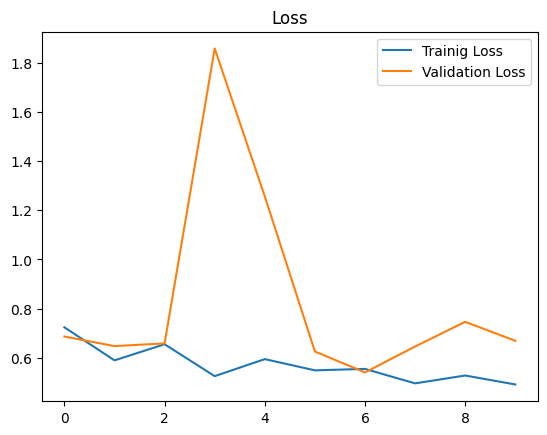

In [202]:
#Loss
plt.figure()
plt.plot(result.history['loss'], label='Trainig Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

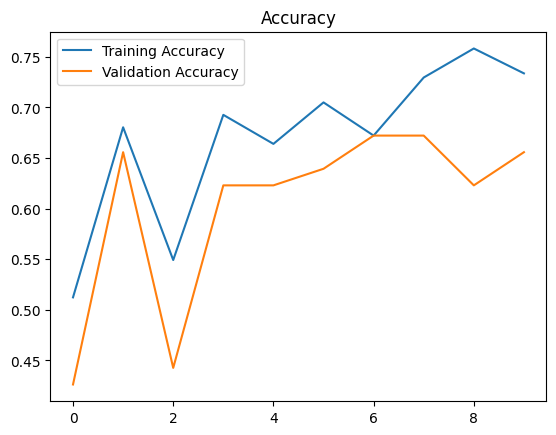

In [204]:
#Accuracy
plt.figure()
plt.plot(result.history['accuracy'], label='Training Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [211]:
model_2 = tf.keras.models.Sequential()

In [212]:
model_2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(220,220,3)))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(32, (3,3), 1, activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(16, (3,3), 1, activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Flatten())
model_2.add(Dense(256, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

In [213]:
model_2.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [214]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 109, 109, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 51, 51, 16)        4624      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 25, 25, 16)      

In [215]:
hist = model_2.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
31/31 [==============================] - 26s 712ms/step - loss: 0.6934 - accuracy: 0.6475 - val_loss: 0.6724 - val_accuracy: 0.6393
Epoch 2/20
31/31 [==============================] - 23s 678ms/step - loss: 0.5709 - accuracy: 0.7500 - val_loss: 0.5172 - val_accuracy: 0.7541
Epoch 3/20
31/31 [==============================] - 24s 722ms/step - loss: 0.3672 - accuracy: 0.8893 - val_loss: 0.5512 - val_accuracy: 0.7541
Epoch 4/20
31/31 [==============================] - 23s 679ms/step - loss: 0.2936 - accuracy: 0.9139 - val_loss: 0.5617 - val_accuracy: 0.7869
Epoch 5/20
31/31 [==============================] - 23s 699ms/step - loss: 0.1309 - accuracy: 0.9549 - val_loss: 0.5028 - val_accuracy: 0.8525
Epoch 6/20
31/31 [==============================] - 24s 726ms/step - loss: 0.0525 - accuracy: 0.9877 - val_loss: 0.9638 - val_accuracy: 0.8525
Epoch 7/20
31/31 [==============================] - 28s 859ms/step - loss: 0.0271 - accuracy: 0.9918 - val_loss: 0.9841 - val_accuracy: 0.7869

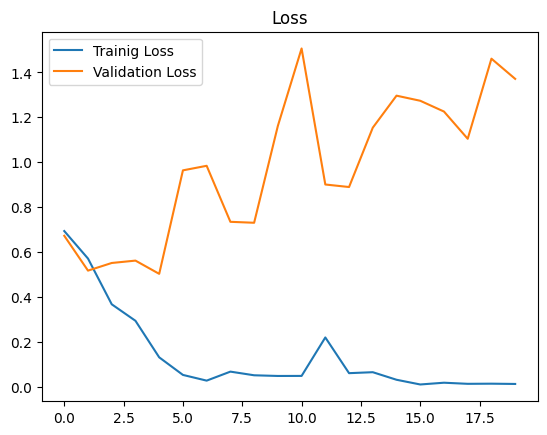

In [216]:
#Loss
plt.figure()
plt.plot(hist.history['loss'], label='Trainig Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

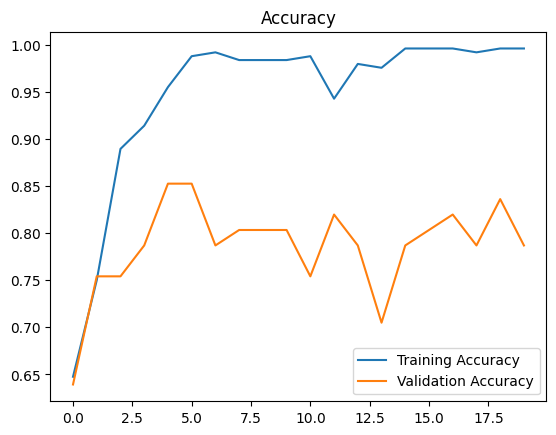

In [217]:
#Accuracy
plt.figure()
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()